## 2023 Women's World Cup group stages: squad rotation analysis

At the end of the group stage of the 2023 Women's World Cup, I wanted to see if the perception of the US as rotating less than other teams was supported by the data. I picked 3 metrics to look at in an attempt to quantify “squad rotation”:

- Mean number of subs used per game (fewer = less rotation, more = more rotation)
- Median sub time (earlier = more rotation, later = less rotation; I used median instead of mean to de-emphasize early injury subs and similar outliers)
- Median number of minutes played per player (lower = more rotation since minutes are more “spread” amongst players, higher = less rotation; same rationale for median as sub time)

Below, I visualized the distributions of each metric over all 32 teams, with the US and Sweden marked on each plot.

All data is from FBRef (I collected the substitution counts/times from the match reports by hand, and the player data came from https://fbref.com/en/comps/106/playingtime/Womens-World-Cup-Stats)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Mean number of substitutions across games

In [2]:
n_subs_df = pd.read_csv(
    './data/wc_2023_num_subs.csv',
    names=['team', 'game_1', 'game_2', 'game_3']
).set_index('team')

print(n_subs_df.shape)
n_subs_df.head()

(32, 3)


,game_1,game_2,game_3
team,,,
Norway,3,5,5
New Zealand,3,3,5
Australia,2,2,3
Ireland,3,5,3
Nigeria,3,5,3


In [3]:
mean_subs_df = (n_subs_df
  .mean(axis='columns')
  .to_frame(name='mean_subs')
  .reset_index()
  .sort_values(by='mean_subs', ascending=True)
)

mean_subs_df.head()

,team,mean_subs
2,Australia,2.333333
22,France,2.333333
30,Colombia,3.000000
23,Jamaica,3.000000
9,Costa Rica,3.000000


In [4]:
mean_subs_df

,team,mean_subs
2,Australia,2.333333
22,France,2.333333
30,Colombia,3.000000
23,Jamaica,3.000000
9,Costa Rica,3.000000
15,Haiti,3.333333
14,England,3.333333
12,Zambia,3.666667
10,USA,3.666667
19,South Africa,3.666667


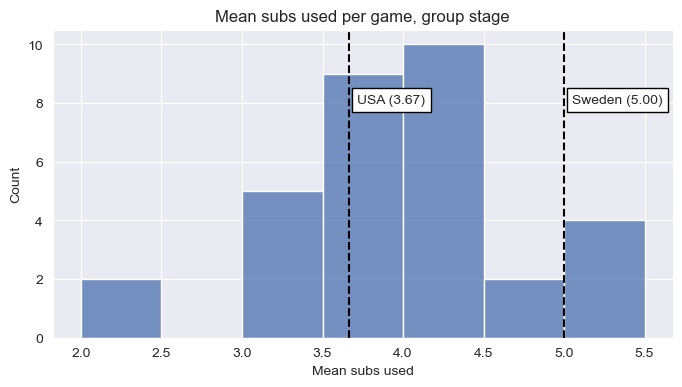

In [5]:
sns.set({'figure.figsize': (8, 4)})

ax = sns.histplot(
    data=mean_subs_df, x='mean_subs', binwidth=0.5, binrange=(2, 5.5)
)

us_mean_subs = mean_subs_df[mean_subs_df.team == 'USA'].mean_subs.values[0]
ax.axvline(
    x=us_mean_subs, linestyle='--', color='black'
)
ax.text(
    us_mean_subs+0.05, 8, f'USA ({us_mean_subs:.2f})',
    size=10, bbox={'facecolor': 'white', 'edgecolor': 'black'}
)

sweden_mean_subs = mean_subs_df[mean_subs_df.team == 'Sweden'].mean_subs.values[0]
ax.axvline(
    x=sweden_mean_subs, linestyle='--', color='black'
)
ax.text(
    sweden_mean_subs+0.05, 8, f'Sweden ({sweden_mean_subs:.2f})',
    size=10, bbox={'facecolor': 'white', 'edgecolor': 'black'}
)

plt.title('Mean subs used per game, group stage')
plt.xlabel('Mean subs used')

plt.savefig('./mean_subs_used.png', bbox_inches='tight', dpi=200)

### Median substitution time, across games

In [6]:
sub_times_df = pd.read_csv(
    './data/wc_2023_sub_times.csv', index_col=0, header=None, names=list(range(17))
)
sub_times_df.index.name = 'team'

print(sub_times_df.shape)
sub_times_df.head()

(32, 16)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
team,,,,,,,,,,,,,,,,
Norway,56,74,90,57,73,73,88,88.0,68.0,68.0,68.0,81.0,82.0,NaN,NaN,NaN
New Zealand,70,86,90,46,46,84,46,62.0,62.0,72.0,82.0,NaN,NaN,NaN,NaN,NaN
Australia,75,85,82,85,75,84,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ireland,63,63,87,46,58,65,65,65.0,83.0,84.0,90.0,NaN,NaN,NaN,NaN,NaN
Nigeria,73,85,90,63,64,76,77,90.0,67.0,68.0,84.0,NaN,NaN,NaN,NaN,NaN


In [7]:
median_sub_times_df = (sub_times_df
  .median(axis='columns') # excludes NA by default
  .to_frame(name='median_sub_time')
  .reset_index()
  .sort_values(by='median_sub_time', ascending=True)
)

median_sub_times_df.head(10)

,team,median_sub_time
5,Canada,52.5
11,Vietnam,61.0
29,Panama,62.0
8,Spain,63.0
22,France,65.0
3,Ireland,65.0
26,Germany,65.0
19,South Africa,67.0
18,Sweden,67.0
6,Philippines,70.0


In [8]:
median_sub_times_df

,team,median_sub_time
5,Canada,52.5
11,Vietnam,61.0
29,Panama,62.0
8,Spain,63.0
22,France,65.0
3,Ireland,65.0
26,Germany,65.0
19,South Africa,67.0
18,Sweden,67.0
6,Philippines,70.0


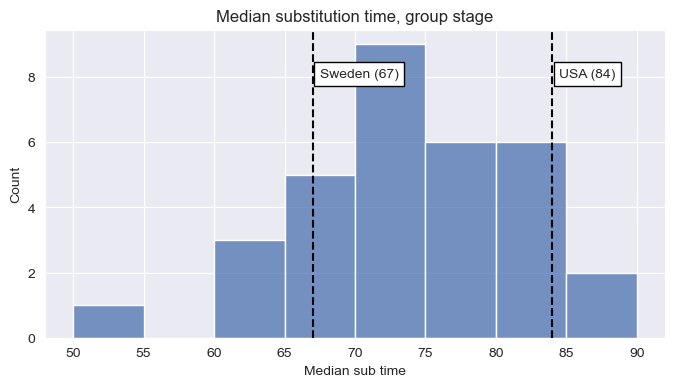

In [9]:
sns.set({'figure.figsize': (8, 4)})

ax = sns.histplot(
    data=median_sub_times_df, x='median_sub_time', binwidth=5, binrange=(50, 90)
)

us_median_time = median_sub_times_df[median_sub_times_df.team == 'USA'].median_sub_time.values[0]
ax.axvline(
    x=us_median_time, linestyle='--', color='black'
)
ax.text(
    us_median_time+0.5, 8, f'USA ({us_median_time:.0f})',
    size=10, bbox={'facecolor': 'white', 'edgecolor': 'black'}
)

sweden_median_time = median_sub_times_df[median_sub_times_df.team == 'Sweden'].median_sub_time.values[0]
ax.axvline(
    x=sweden_median_time, linestyle='--', color='black'
)
ax.text(
    sweden_median_time+0.5, 8, f'Sweden ({sweden_median_time:.0f})',
    size=10, bbox={'facecolor': 'white', 'edgecolor': 'black'}
)

plt.title('Median substitution time, group stage')
plt.xlabel('Median sub time')

plt.savefig('./median_sub_time.png', bbox_inches='tight', dpi=200)

### Median number of minutes played, across players on each team

In [10]:
players_df = pd.read_csv(
    './data/wc_2023_playing_time.csv', sep='\t', index_col=0, header=None
)

players_df = (players_df
    .loc[:, [1, 3, 6, 7]]
    .rename(columns={
        1: 'player_name',
        3: 'team',
        6: 'matches_played',
        7: 'minutes_played'
    })
)

# remove flag letters
players_df['team'] = players_df.team.str[3:]

# remove players who haven't played
players_df = players_df[players_df.matches_played > 0].copy()

print(players_df.shape)
players_df.head()

(598, 4)


,player_name,team,matches_played,minutes_played
0,,,,
1,Teresa Abelleira,Spain,3,237.0
2,Deborah Abiodun,Nigeria,1,89.0
3,Adriana,Brazil,3,259.0
4,Lily Agg,Rep. of Ireland,2,108.0
5,Eseosa Aigbogun,Switzerland,3,270.0


In [11]:
print(players_df.team.unique())

['Spain' 'Nigeria' 'Brazil' 'Rep. of Ireland' 'Switzerland' 'Costa Rica'
 'Portugal' 'Morocco' 'Sweden' 'Colombia' 'Vietnam' 'Philippines'
 'Germany' 'Australia' 'France' 'Panama' 'Denmark' 'Zambia' 'Argentina'
 'Italy' 'Netherlands' 'Norway' 'South Africa' 'Jamaica' 'Haiti'
 'New Zealand' ' England' 'Canada' 'Korea Republic' 'China PR' 'Japan'
 'USA']


In [12]:
minutes_df = (players_df
    .drop(columns=['player_name'])
    .groupby('team')
    .agg('median')
    .sort_values(by='minutes_played', ascending=False)
    .reset_index()
)

minutes_df.head()

,team,matches_played,minutes_played
0,Australia,3.0,269.0
1,Colombia,3.0,267.0
2,Switzerland,3.0,242.0
3,New Zealand,3.0,220.0
4,Philippines,3.0,217.0


In [13]:
minutes_df

,team,matches_played,minutes_played
0,Australia,3.0,269.0
1,Colombia,3.0,267.0
2,Switzerland,3.0,242.0
3,New Zealand,3.0,220.0
4,Philippines,3.0,217.0
5,Netherlands,3.0,214.0
6,Haiti,3.0,208.0
7,USA,3.0,205.5
8,England,3.0,195.0
9,Rep. of Ireland,3.0,194.5


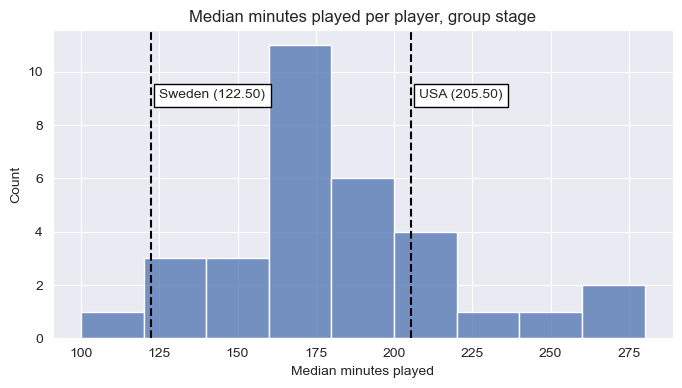

In [14]:
sns.set({'figure.figsize': (8, 4)})

ax = sns.histplot(
    data=minutes_df, x='minutes_played', binwidth=20, binrange=(100, 280)
)

us_median_minutes = minutes_df[minutes_df.team == 'USA'].minutes_played.values[0]
ax.axvline(
    x=us_median_minutes, linestyle='--', color='black'
)
ax.text(
    us_median_minutes+2.5, 9, f'USA ({us_median_minutes:.2f})',
    size=10, bbox={'facecolor': 'white', 'edgecolor': 'black'}
)

sweden_median_minutes = minutes_df[minutes_df.team == 'Sweden'].minutes_played.values[0]
ax.axvline(
    x=sweden_median_minutes, linestyle='--', color='black'
)
ax.text(
    sweden_median_minutes+2.5, 9, f'Sweden ({sweden_median_minutes:.2f})',
    size=10, bbox={'facecolor': 'white', 'edgecolor': 'black'}
)

plt.title('Median minutes played per player, group stage')
plt.xlabel('Median minutes played')

plt.savefig('./median_mins_per_player.png', bbox_inches='tight', dpi=200)

So for the US/Sweden matchup in the round of 16, it seems fairly clear that for each of these metrics, the US has rotated “less” than Sweden, and we should probably expect Sweden’s players to be a bit fresher going into the knockout game. Whether it will matter or not, we will see.

Looking forward to the other teams on the US’s side of the bracket: I didn't mark them on the plots, but generally Japan, Spain, Norway are all toward the “more rotation” side of these measurements; Switzerland, Netherlands and South Africa are more comparable to the US on the “less rotation” side of things. This is obviously only one factor of many, but it’ll be interesting to see how it all plays out!